##### importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

##### importing the exel file

In [3]:
df = pd.read_excel(r"Online%20Retail.xlsx")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df['CustomerID'].dropna(inplace=True)

In [16]:
sold_quantity = len(df[df['Quantity'] > 0])
return_quantity = len(df[df['Quantity'] < 0])
return_pcrt = (return_quantity / len(df['Quantity'])) * 100

print(f"total sales transactions: {sold_quantity}")
print(f"total return transactions: {return_quantity}")
print(f"prcentage of return transactions: {return_pcrt:.2f}%")

total sales transactions: 531285
total return transactions: 10624
prcentage of return transactions: 1.96%


In [4]:
sales_df = df[df['Quantity'] > 0].copy()
return_df = df[df['Quantity'] < 0].copy()

In [5]:
sales_df['Total_sales'] = sales_df['Quantity'] * sales_df['UnitPrice']
sales_df.to_csv('sales_df.csv')
sales_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


##### monthly sales trade (line chart)

In [ ]:
monthly_sales = sales_df['Total_sales'].groupby(sales_df['InvoiceDate'].dt.strftime('%B')).sum()
monthly_sales.reset_index().sort_values(by= 'Total_sales', ascending=False)

,InvoiceDate,Total_sales
9,November,1509496.330
2,December,1462538.820
10,October,1154979.300
11,September,1058590.172
8,May,770536.020
6,June,761739.900
1,August,737014.260
5,July,719221.191
7,March,717639.360
4,January,691364.560


In [29]:
october_sales = sales_df[sales_df['InvoiceDate'].dt.month == 10]
october_sales_total = october_sales['Total_sales'].sum()    
october_prct = october_sales_total / sales_df['Total_sales'].sum() * 100

november_sales = sales_df[sales_df['InvoiceDate'].dt.month == 11]
november_sales_total = november_sales['Total_sales'].sum()    
november_prct = november_sales_total / sales_df['Total_sales'].sum() * 100

print(f"Total sales in October: ${october_sales_total:,.2f}, which is {october_prct:.2f}% of total sales.")
print(f"Total sales in November: ${november_sales_total:,.2f}, which is {november_prct:.2f}% of total sales.")
print(f"{november_prct + october_prct:.2f}% of total sales come from October and November alone.")

Total sales in October: $1,154,979.30, which is 10.85% of total sales.
Total sales in November: $1,509,496.33, which is 14.18% of total sales.
25.03% of total sales come from October and November alone.


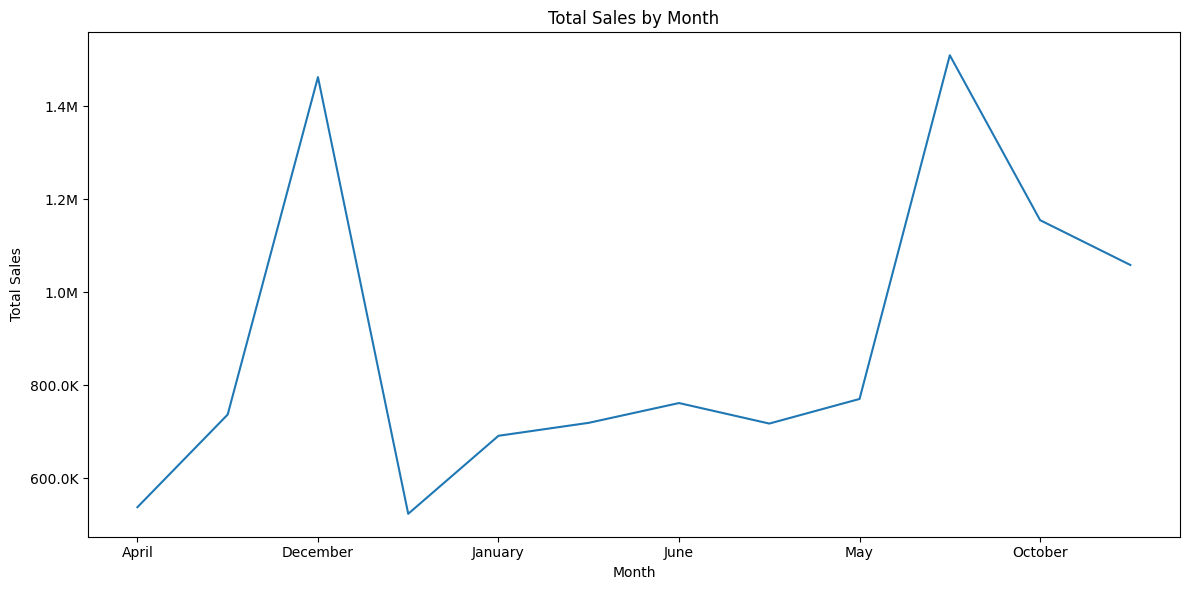

In [140]:
monthly_sales = sales_df.groupby(sales_df['InvoiceDate'].dt.strftime('%B'))['Total_sales'].sum()

plt.figure(figsize=(12,6))
ax = monthly_sales.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')

def human_format(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return f'{x:.0f}'

ax.yaxis.set_major_formatter(mtick.FuncFormatter(human_format))

plt.tight_layout()
plt.show()

##### Top 10 products by revenue (bar chart)

In [8]:
top_10_products = sales_df.groupby('Description')['Total_sales'].sum()
top_10_products.reset_index().nlargest(10, 'Total_sales')

,Description,Total_sales
1072,DOTCOM POSTAGE,206248.77
2867,REGENCY CAKESTAND 3 TIER,174484.74
2401,"PAPER CRAFT , LITTLE BIRDIE",168469.60
3860,WHITE HANGING HEART T-LIGHT HOLDER,106292.77
2427,PARTY BUNTING,99504.33
1827,JUMBO BAG RED RETROSPOT,94340.05
2065,MEDIUM CERAMIC TOP STORAGE JAR,81700.92
2205,Manual,78112.82
2706,POSTAGE,78101.88
2755,RABBIT NIGHT LIGHT,66964.99


In [53]:
top_5_products = sales_df.groupby('Description')['Total_sales'].sum()
top_5_products_pcrt = (top_5_products.nlargest)(5).sum() / sales_df['Total_sales'].sum() * 100

print(f"Top 5 products account for {top_5_products_pcrt:.2f}% of total revenue.")

Top 5 products account for 7.09% of total revenue.


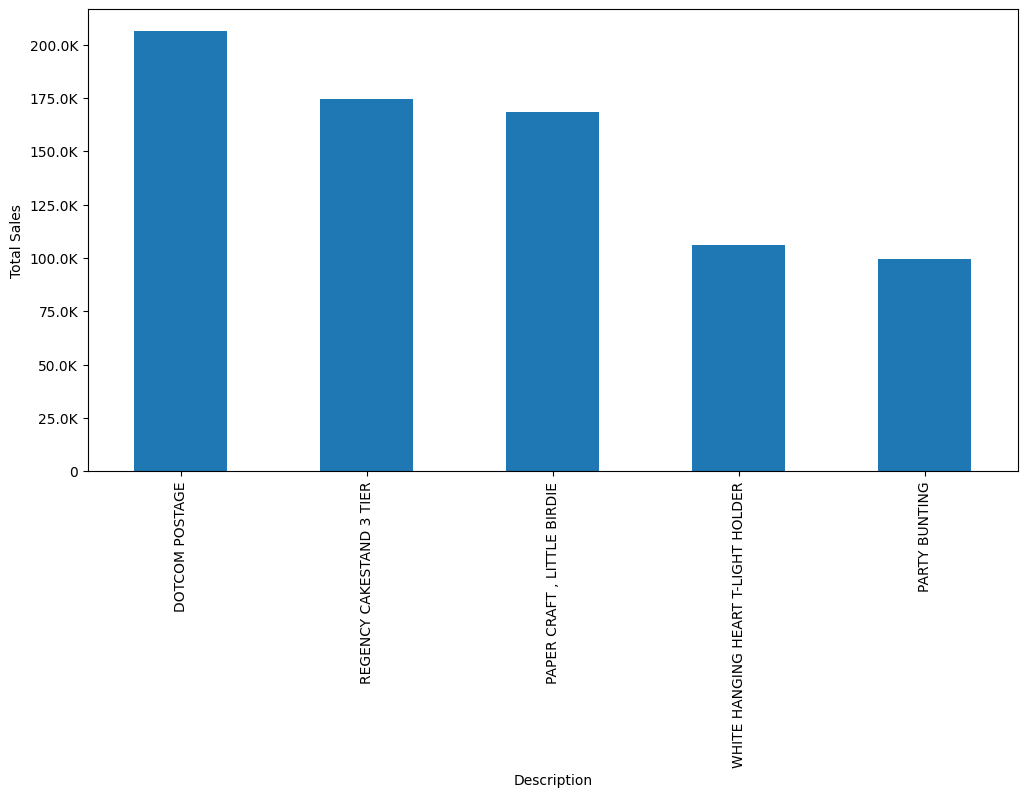

In [100]:
plt.figure(figsize=(12,6))
ax = top_5_products.nlargest(5).plot(kind='bar')
plt.xlabel('Description')
plt.ylabel('Total Sales')  

def format(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return f'{x:.0f}'

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format))
plt.show()    

##### Sales by country (top 5 countries)

In [107]:
top_countries = sales_df.groupby('Country')['Total_sales'].sum()
top_countries.reset_index().nlargest(5, 'Total_sales')

,Country,Total_sales
36,United Kingdom,9003097.964
24,Netherlands,285446.340
10,EIRE,283453.960
14,Germany,228867.140
13,France,209715.110


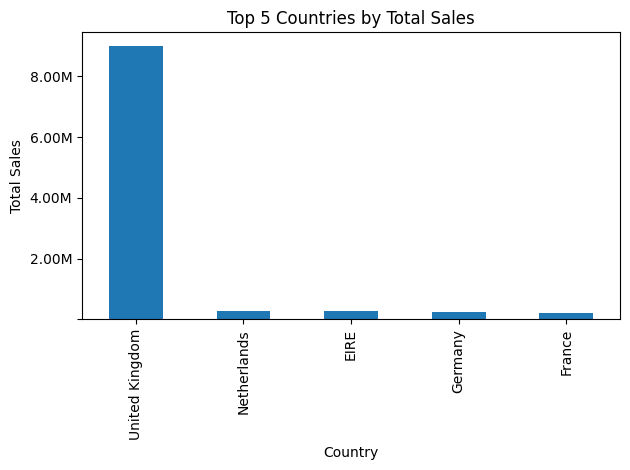

In [122]:
ax = top_countries.nlargest(5).plot(kind='bar')

def format(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.2f}M'
    elif x >= 1_000:
        return f'{x/1_000:.2f}k'

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format))  

plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 5 Countries by Total Sales')
plt.tight_layout()
plt.show()
plt.show()  


In [123]:
sales_df['pcrt'] = (sales_df['Total_sales'] / sales_df['Total_sales'].sum()) * 100

pcrt = sales_df.groupby('Country')['pcrt'].sum()
pcrt.nlargest(5).reset_index()

,Country,pcrt
0,United Kingdom,84.579331
1,Netherlands,2.681617
2,EIRE,2.662900
3,Germany,2.150085
4,France,1.970162


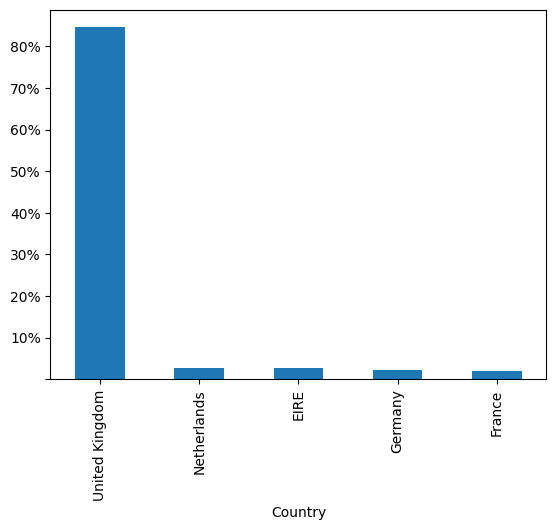

In [119]:
ax = pcrt.nlargest(5).plot(kind='bar', x='Country', y='pcrt', legend=False)

def format(x, pos0):
    if x > 0:
        return f'{x:.0f}%'
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format))
plt.show()

##### Average order value over time

In [55]:
avg_order_over_time = (sales_df['InvoiceDate'].count()) / sales_df['Quantity'].sum()
print(f"{avg_order_over_time:.3f} is avg order over the entire period.")

0.094 is avg order over the entire period.


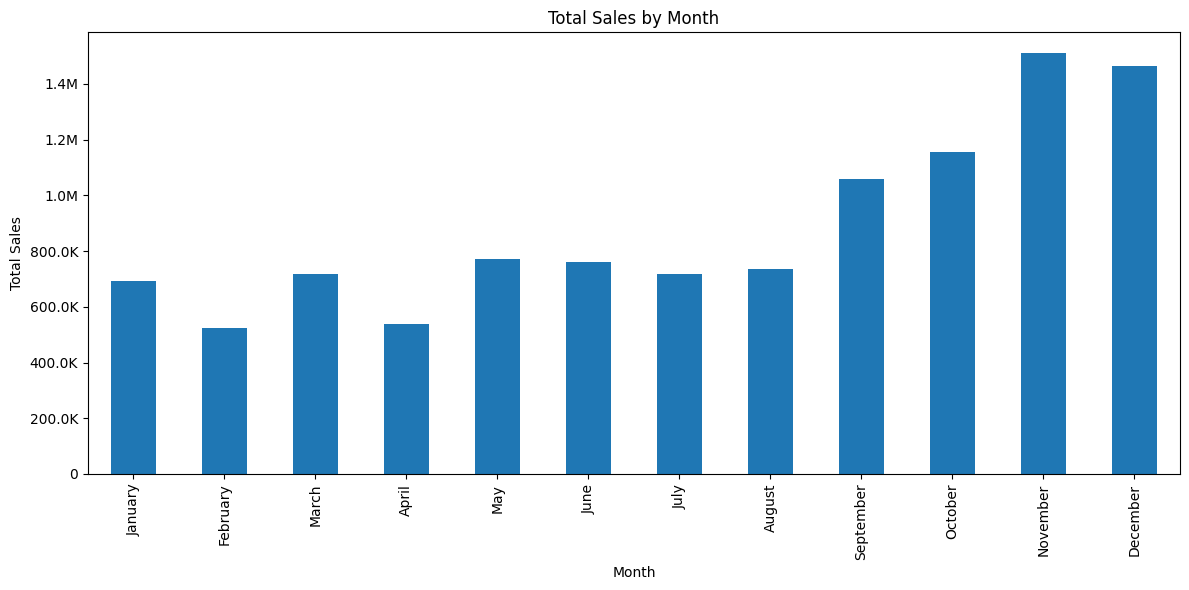

##### Top 10 customers by total spending

In [7]:
top_10_customers = sales_df.groupby('CustomerID')['Total_sales'].sum()
top_10_customers.reset_index().nlargest(10, 'Total_sales')

,CustomerID,Total_sales
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194550.79
3009,16446.0,168472.50
1880,14911.0,143825.06
55,12415.0,124914.53
1334,14156.0,117379.63
3772,17511.0,91062.38
2703,16029.0,81024.84
0,12346.0,77183.60
